# 1.단항 논리 회귀 실습
* 논리 회귀(Logistic Regression)
* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐

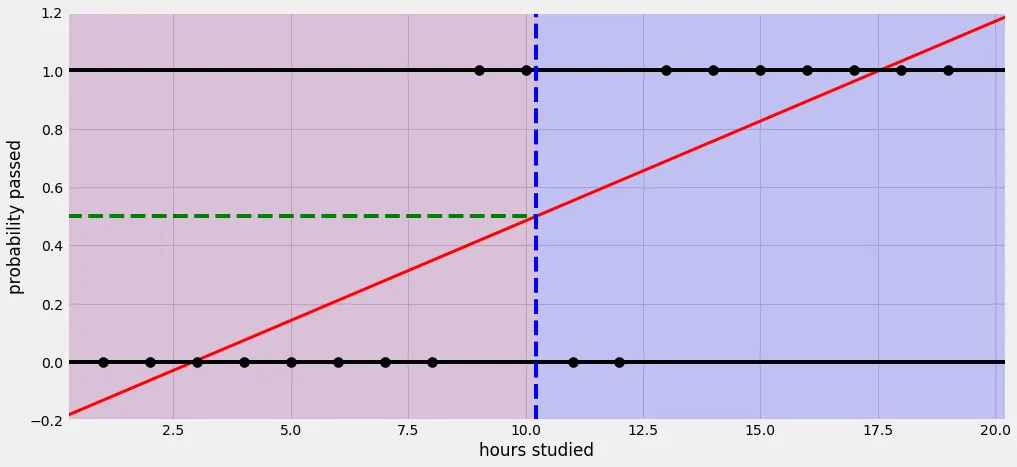

### 직선하나(선형 회귀)를 사용해서 예측한다면 제대로 예측할 수 없음

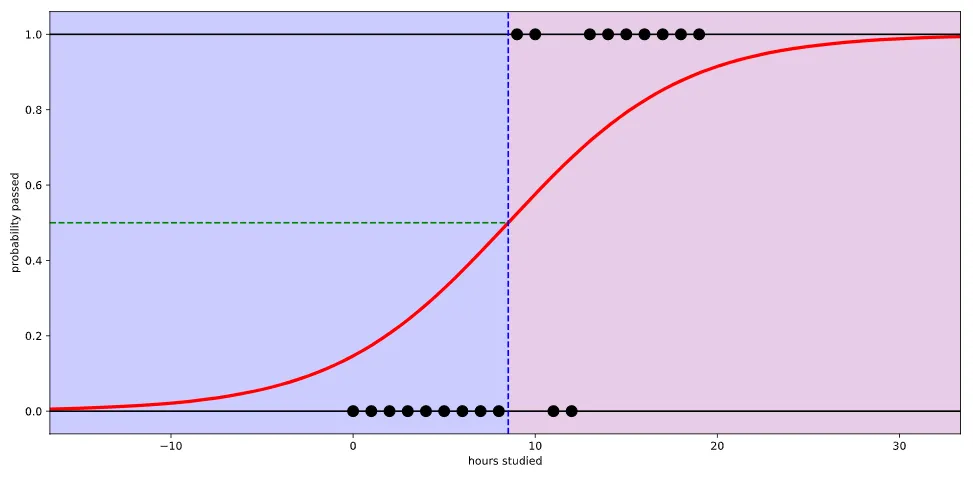

### Sigmoid 함수(Logisic 함수)를 사용하여 정확도를 높임

### Sigmoid 함수
- 예측값을 0에서 1사이 값이 되도록 만듬
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5를 기준으로 구분

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(10)

In [ ]:
x_train = torch.FloatTensor([[0],[1],[3],[5],[9],[11],[13],[15],[20]])
y_train = torch.FloatTensor([[0],[0],[0],[0],[0],[0],[1],[1],[1]])

print(x_train.shape)
print(y_train.shape)

torch.Size([9, 1])
torch.Size([9, 1])


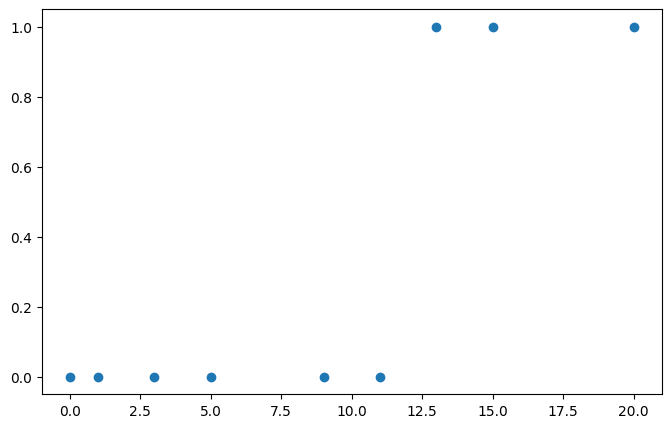

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

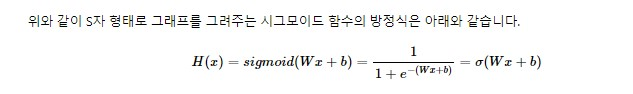

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

print(model) #입출력이 1개씩 있다


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


### 비용 함수
* 논리 회귀에서는 nn.BCELoss()함수를 사용하여 Loss를 계싼
* Binary Cross Emtropy



In [ ]:
y_pred = model(x_train)
y_pred

tensor([[0.4914],
        [0.4705],
        [0.4290],
        [0.3885],
        [0.3124],
        [0.2776],
        [0.2453],
        [0.2156],
        [0.1530]], grad_fn=<SigmoidBackward0>)

In [ ]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(0.8757, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.BCELoss()(y_pred, y_train) #모델의 예측값과 실제값 사이의 평균 제곱 오차(MSE)를 계산하여 손실 함수의 값을 계산합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 0.875677
Epoch 100/100 Loss: 0.613145
Epoch 200/200 Loss: 0.567695
Epoch 300/300 Loss: 0.529384
Epoch 400/400 Loss: 0.496889
Epoch 500/500 Loss: 0.469130
Epoch 600/600 Loss: 0.445233
Epoch 700/700 Loss: 0.424501
Epoch 800/800 Loss: 0.406379
Epoch 900/900 Loss: 0.390421
Epoch 1000/1000 Loss: 0.376273


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.1686]], requires_grad=True), Parameter containing:
tensor([-1.6880], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[2.5],[15.5]])
y_pred = model(x_test)
print(y_pred)

tensor([[0.2199],
        [0.7162]], grad_fn=<SigmoidBackward0>)


In [ ]:
# 임계치 설정하기
# 0.5보다 크거나 같으면 1
# 0.5보다 작으면 0
y_bool = (y_pred >= 0.5).float()
print(y_bool)

tensor([[0.],
        [1.]])


### 2. 다항 논리 회귀 실습


In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
# 입력이 4가지
y_train = [0, 0, 0, 1, 1, 1, 2, 2]
# 출력은 3개
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [ ]:
model = nn.Sequential(
    nn.Linear(4, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [ ]:
y_pred = model(x_train)
print(y_pred)

tensor([[-0.1358,  1.5655, -0.0104],
        [-1.0986,  1.3559,  0.5590],
        [-1.4625,  1.2105,  0.7214],
        [-2.3103,  1.4702,  1.2348],
        [-1.0576,  3.7047,  0.7548],
        [-1.7209,  1.1885,  1.0922],
        [-1.5469,  3.1835,  1.0722],
        [-1.8061,  3.6010,  1.2775]], grad_fn=<AddmmBackward0>)


In [ ]:
# 다항 논리 회귀에서는 BCELoss() 대신 CrossEntropyLoss()를 사용
# 소프트맥스 함수가 포함 클래스의 개수만큼 확률를 내보낸다
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.7613, grad_fn=<NllLossBackward0>)


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train) #모델의 예측값과 실제값 사이의 평균 제곱 오차(MSE)를 계산하여 손실 함수의 값을 계산합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 1.761291
Epoch 100/100 Loss: 0.633731
Epoch 200/200 Loss: 0.550764
Epoch 300/300 Loss: 0.497095
Epoch 400/400 Loss: 0.453218
Epoch 500/500 Loss: 0.413998
Epoch 600/600 Loss: 0.377086
Epoch 700/700 Loss: 0.340971
Epoch 800/800 Loss: 0.304561
Epoch 900/900 Loss: 0.268059
Epoch 1000/1000 Loss: 0.242054


In [ ]:
x_test = torch.FloatTensor([[1,2,5,6]])
y_pred = model(x_test)
print(y_pred)

tensor([[-4.9985,  3.4779,  2.0804]], grad_fn=<AddmmBackward0>)


In [ ]:
# 예측값과 확률 구하기
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[1.6701e-04, 8.0166e-01, 1.9817e-01]], grad_fn=<SoftmaxBackward0>)

In [ ]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.80
2일 확률: 0.20


In [ ]:
# 가장 높은 예측값 확률 인덱스 구하
torch.argmax(y_prob, axis=1)

tensor([1])

# 3. 와인 품종 예측해보기
* sklearn.datasets.lad_wine 데이터셋은 이탈리아의 같은 지역에서 재배된 세가지 다른 품종으로 만든 와인을 화학적으로 분석한 결과

### 문제
* 13개의 성분을 분석하여 어떤 와인인지 맞춰보기
* 단, 트레이님 데이터를 80% 테스트데이터 20%로 하며 테스트 데이터의 0번 인덱스가 어떤 와인인지 출력하고 테스트 정확도도 출력

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
x_data, y_data = load_wine(return_X_y=True, as_frame=True)

In [ ]:
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.LongTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_one_hot = nn.functional.one_hot(y_data, num_classes=3).float()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_one_hot, test_size=0.2, random_state=10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([142, 13]) torch.Size([142, 3])
torch.Size([36, 13]) torch.Size([36, 3])


In [ ]:
model = nn.Sequential(
    nn.Linear(13, 3)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        y_train_index = torch.argmax(y_train, axis=1)
        accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100
        print(f'Epoch { epoch:4d}/{epochs} Loss: {loss:.6f} Accuracy: {accuracy:.2f}%')

Epoch    0/1000 Loss: 151.767410 Accuracy: 37.32%
Epoch  100/1000 Loss: 0.313477 Accuracy: 87.32%
Epoch  200/1000 Loss: 0.191663 Accuracy: 95.07%
Epoch  300/1000 Loss: 0.152780 Accuracy: 95.07%
Epoch  400/1000 Loss: 0.131276 Accuracy: 95.77%
Epoch  500/1000 Loss: 0.116702 Accuracy: 96.48%
Epoch  600/1000 Loss: 0.105769 Accuracy: 97.89%
Epoch  700/1000 Loss: 0.097089 Accuracy: 97.89%
Epoch  800/1000 Loss: 0.089954 Accuracy: 98.59%
Epoch  900/1000 Loss: 0.083945 Accuracy: 98.59%
Epoch 1000/1000 Loss: 0.078781 Accuracy: 98.59%


# 4. 경사하강법의 종류

### 4-1. 배치 경사 하강법
* 가장 기본적인 경사 하강법(Vanilla Gradient Descent)
* 데이터셋 전체를 고려하여 손실함수 계산
* 한 번의 Epoch에 모든 파라미터 업데이트를 단 한법만 수행
* batch의 새수와 lteration은 1이고 Batch size는 전체 데이터의 갯수
* 파라미터 업데티트힐 뗴 한 번에 전체 데이터셋을 고려하기 떄문에 모델 학습 시 많은 시간과 메모리가 필요가 단점



### 4-2. 확률적 경사 하강법
* 확률적 경사 하강법(Stochastic Fradient Descent)은 배치 경사 하강법이 모델학습 시 많은 시간과 메모리가 필요하다는 단점을 개선하기 위해 제안된 기법
* Batch size를 1로 설정하여 파라미터를 업데이트 하기 때문에 배치 경사 하강법보다 훨씬 빠르고 적은 메모리로 학습이 진행(데이터가 정확하거나 구분이 잘 되야함)
* 파라미터 값의 업데이트 폭이 불안정하기 떄문에 정확도가 낮은 경우가 생길수 있음

### 4-3. 미니배치 경사 하강법
* 미니 배치 경사 하강법(Mini-Batch Gradient)은 Batch size가 1도 전체 데이터 개수도 아닌 경우
* 배치 경사 하강법보다 모델 학습 속도가 빠르고, 확률적 경사 하강법보다 안정적인 장점이 있음
* 딥러닝 분야에서 가장 많이 활용되는 경사 하강법
* 일반적으로 Batch size를 32, 64, 128과 같이 2의n제곱에 해당하는 값으로 사용하는게 보편적


# 5.경사 하강법의 여러가지 기술들

### 5-1. 확률적 경사 하강법(SGD)
* 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법

### 5-2. 모멘텀(momentum)
* 관성이라는 물리학의 법칙을 응용한 방법
* 경사 하강법에 관성을 더 해줌
* 접선의 기울기에 한 시점 이전에 접선의 기울기 값을 일정한 비율만큼 반영
* 언덕에서 공이 내려올 떼 중간의 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있음


### 5-3. 아다그라드(Adagrad)
* 모든 매개변수에 동일한 학습률(Leaning rate)을 적용하는 것은 비효율적이라는 생각에서 만들어진 학습 방법
* 처음에는 크게 학습하다가 조금씩 작게 학습시킴

### 5-4. 아담(Adam)
* 모멘텀 + 아다그라드


In [ ]:
y_pred = model(x_test)
y_pred[:5]

tensor([[54.1817, 57.1450, 51.6987],
        [29.5653, 36.1488, 28.9702],
        [63.2941, 61.7495, 57.8232],
        [36.9321, 43.1219, 35.2646],
        [81.0713, 75.6855, 75.3495]], grad_fn=<SliceBackward0>)

In [ ]:
y_prob = nn.Softmax(1)(y_pred)
y_pred[:5]

tensor([[54.1817, 57.1450, 51.6987],
        [29.5653, 36.1488, 28.9702],
        [63.2941, 61.7495, 57.8232],
        [36.9321, 43.1219, 35.2646],
        [81.0713, 75.6855, 75.3495]], grad_fn=<SliceBackward0>)

In [ ]:
print(f'0번 품종일 확률: {y_prob[0][0]:.2f}')
print(f'1번 품종일 확률: {y_prob[0][1]:.2f}')
print(f'2번 품종일 확률: {y_prob[0][2]:.2f}')

0번 품종일 확률: 0.05
1번 품종일 확률: 0.95
2번 품종일 확률: 0.00


In [ ]:
y_pred_index = torch.argmax(y_prob, axis=1)
y_test_index = torch.argmax(y_test, axis=1)
accuracy = (y_test_index == y_pred_index).float().sum() / len(y_test) * 100

print(f'테스트 정확도는 {accuracy:.2f}% 입니다.')

테스트 정확도는 86.11% 입니다.
